# Processing TESS sector 97 data for TOI4504

In [1]:
import sys
sys.path.append('../src/curvesimulator/')
from cs_flux_data import *
# from cs_flux_data import Transit
%matplotlib inline
path = '../data/TOI-4504/'

C_TRANSITS = [2458401.41, 2458483.21, 2458565.09, 2458647.33, 2459065.24, 2459148.48, 2459231.11, 2459313.25, 2459976.05, 2460059.62, 2460142.60]
# spoc_sectors = [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 61, 62, 63, 64, 65, 67, 68, 69, 87, 88, 89, 90, 94]
# spoc_sectors = [28, 31, 34, 37, 61, 64, 67, 88, 89, 94]
spoc_sectors = [97]


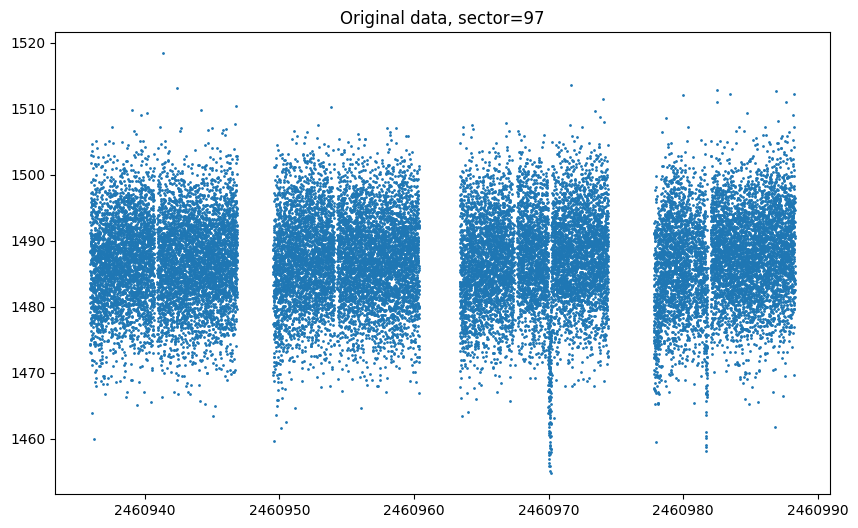

In [2]:
spoc_dfs = []
for sector in spoc_sectors:
    full_path = path + f"downloads/{sector}_SPOC_120.csv"
    # full_path = path + f"downloads/{sector}_SPOC_20.csv"
    # full_path = path + f"downloads/{sector}_QLP_200.csv"
    df = csv2df(full_path)
    df = tesstime2bjd(df)
    spoc_dfs.append(df)
    plot_this(df.time, [df.flux], ["flux"], title=f"Original data, {sector=}")

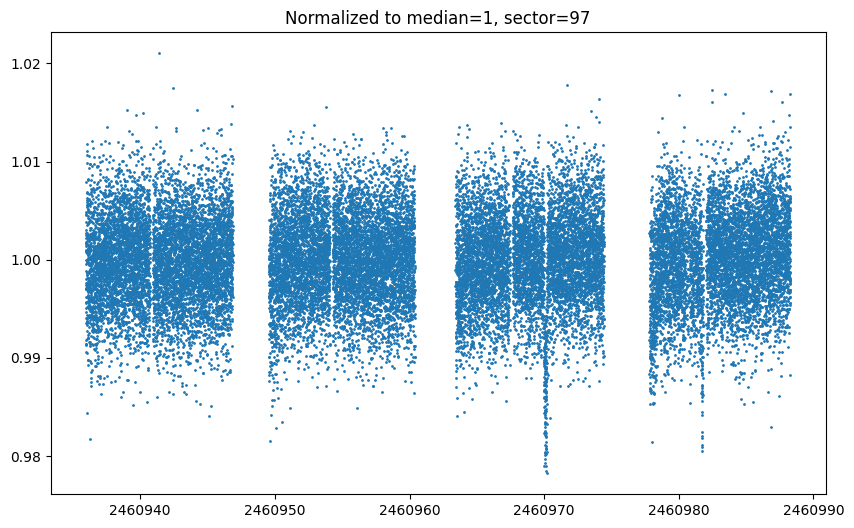

In [3]:
for df, sector in zip(spoc_dfs, spoc_sectors):
    median = median_flux(df)
    df = scale_flux(df, 1/median)
    plot_this(df.time, [df.flux], ["flux"], title=f"Normalized to median=1, {sector=}")

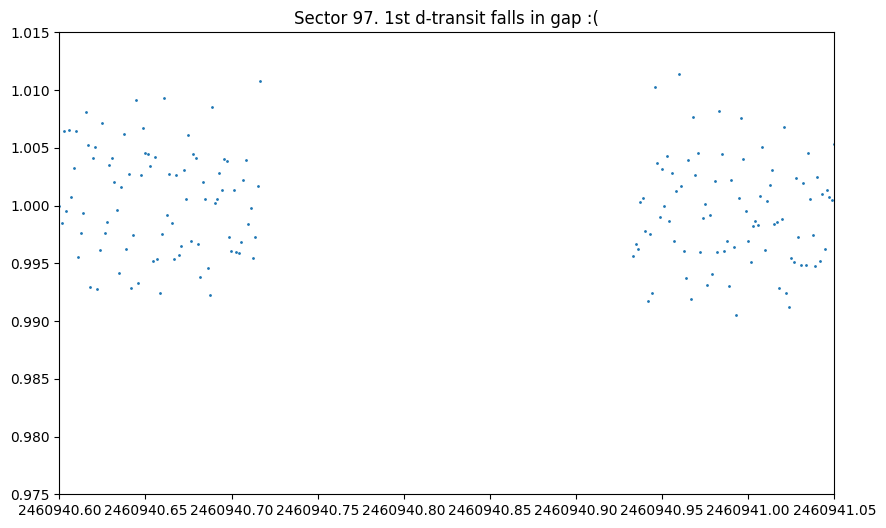

In [4]:
plot_this(df.time, [df.flux], ["flux"], title=f"Sector 97. 1st d-transit falls in gap :(", left=2460940.60, right=2460941.05, top=1.015, bottom=0.975)

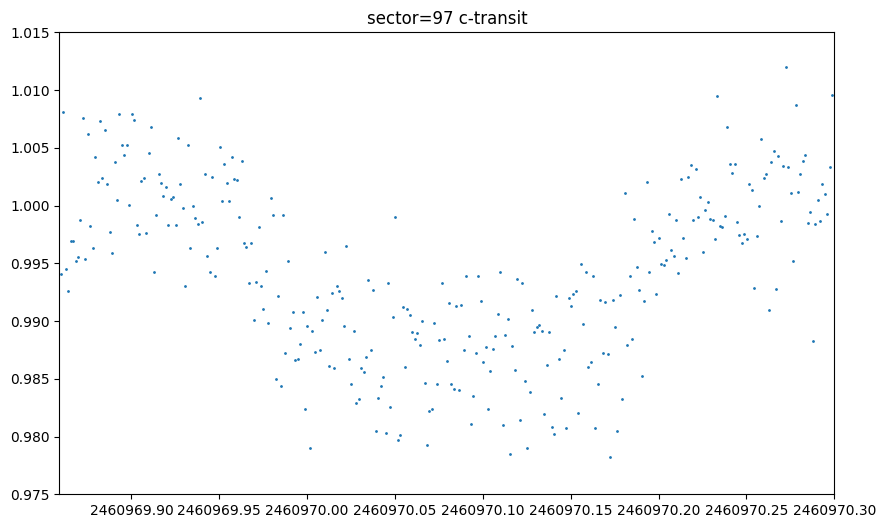

In [5]:
# plot the last sector again
plot_this(df.time, [df.flux], ["flux"], title=f"{sector=} c-transit", left=2460969.859, right=2460970.3, top=1.015, bottom=0.975)

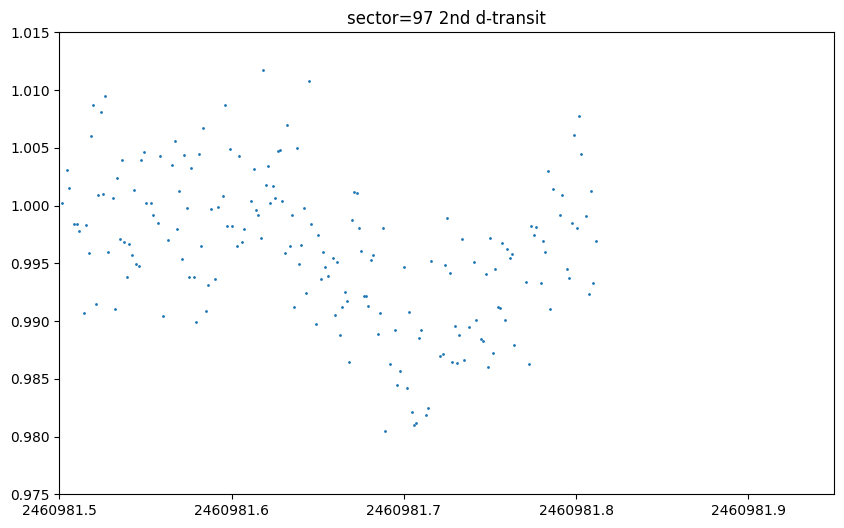

In [6]:
plot_this(df.time, [df.flux], ["flux"], title=f"{sector=} 2nd d-transit", left=2460981.5, right=2460981.95, top=1.015, bottom=0.975)

In [7]:
df

,time,flux,flux_err
0,2.460934e+06,NaN,NaN
1,2.460934e+06,NaN,NaN
2,2.460934e+06,NaN,NaN
3,2.460934e+06,NaN,NaN
4,2.460934e+06,NaN,NaN
...,...,...,...
37886,2.460988e+06,1.002386,0.004845
37887,2.460988e+06,0.998648,0.004842
37888,2.460988e+06,0.996226,0.004841
37889,2.460988e+06,1.002265,0.004850
